## Linear Classification on Iris Flower Dataset

Google it!
1. Process Control Devices(Pacemaker, servers), Process Control Systems
2. Human Genome Project(DNA)

Any task in ML can be represented as three concepts - 
1. Task T
2. Experience E
3. Performance P

Iris Flower Dataset - 1936 by Sir Ronald Fisher and solved using Statistical Methods(Discriminant Analysis)

In [1]:
import sklearn as sk
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
features, labels = iris.data, iris.target

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# Get the data with only two attributes, we will predict label using sepla length and width
x, y = features[:, :2], labels

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True)

In [41]:
x_train.shape, x_test.shape

((112, 2), (38, 2))

In [94]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Text(0,0.5,'sepal width (cm)')

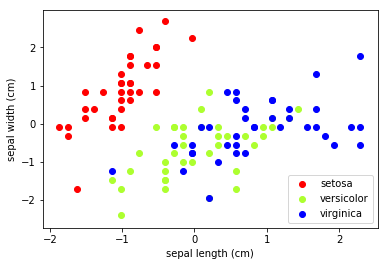

In [46]:
# Plotting sepal length vs sepal width according to their classes
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = x_train[:, 0][y_train == i]
    ys = x_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [47]:
from sklearn.linear_model import SGDClassifier

In [95]:
clf = SGDClassifier()

In [96]:
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [97]:
clf.intercept_

array([-26.5944205 ,  -8.11364115, -15.78544974])

In [98]:
clf.coef_

array([[-32.32071988,  14.95582991],
       [ -6.05398969,   2.0153246 ],
       [ 13.84973047,  -1.90925488]])

In [99]:
clf.predict([[1, 8]])

array([0])

In [100]:
clf.decision_function([[1, 8]])

array([[ 60.73149888,   1.95496594, -17.20975832]])

In [76]:
from sklearn import metrics

In [102]:
y_train_pred = clf.predict(x_train)
print('Train accuracy:', metrics.accuracy_score(y_train, y_train_pred))
y_test_pred = clf.predict(x_test)
print('Train accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Train accuracy: 0.7946428571428571
Train accuracy: 0.8157894736842105
